<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/notebooks/clase6_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 6 (Miércoles 2 de abril, 2025)
---


**5. Matrices ortogonales**

Son matrices **cuadradas** con columnas ortonormales:  
$$Q^TQ=\textrm{Id_n}.$$
Observar que para matrices cuadradas:  
$$
Q^T Q = I \quad \Rightarrow \quad Q^T = Q^{-1}
$$

- Las columnas forman una base ortonormal de $\mathbb{R}^n$.
- Las filas también forman otra base ortonormal (posiblemente distinta).
- El nombre "matriz ortogonal" debería ser "matriz ortonormal".

### Base ortogonal = Ejes ortogonales en $\mathbb{R}^n$

Supongamos que una matriz ortogonal $n \times n$ tiene como columnas a los vectores unitarios $q_1, \dots, q_n$.  
Estos vectores forman una **base ortonormal** del espacio $\mathbb{R}^n$.  
Entonces, cualquier vector $\mathbf{v}$ puede escribirse como una combinación lineal de estos vectores base:

$$
\mathbf{v} = c_1 \mathbf{q}_1 + \cdots + c_n \mathbf{q}_n
\qquad(1)
$$

Los coeficientes $c_1, c_2, \dots, c_n$ son las **componentes** de $\mathbf{v}$ en la dirección de cada vector base.  
¡Son las proyecciones ortogonales de $\mathbf{v}$ sobre cada eje!  
Y hay una fórmula sencilla para calcularlos:

---

#### Coeficientes en una base ortonormal:

$$
c_1 = \mathbf{q}_1^T \mathbf{v}, \quad
c_2 = \mathbf{q}_2^T \mathbf{v}, \quad \dots, \quad
c_n = \mathbf{q}_n^T \mathbf{v}
$$

---

Demostración:  
Toma el producto punto con $\mathbf{q}_1$ en la ecuación (13):

$$
\mathbf{q}_1^T \mathbf{v} = c_1 \mathbf{q}_1^T \mathbf{q}_1 + c_2 \mathbf{q}_1^T \mathbf{q}_2 + \cdots + c_n \mathbf{q}_1^T \mathbf{q}_n = c_1
$$

Todos los términos excepto el primero son cero, ya que $\mathbf{q}_1^T \mathbf{q}_j = 0$ para $j \ne 1$  
(y $\mathbf{q}_1^T \mathbf{q}_1 = 1$).  
Así que: $\mathbf{q}_1^T \mathbf{v} = c_1$ y en general $\mathbf{q}_i^T \mathbf{v} = c_i$.

---

Si escribimos (1) como ecuación matricial: $\mathbf{v} = Q \mathbf{c}$,  
multiplicamos por $Q^T$ para ver la fórmula (14):

$$
Q^T \mathbf{v} = Q^T Q \mathbf{c} = \mathbf{c}
$$

Esto da **todos los coeficientes a la vez**:

$$
\mathbf{c} = Q^T \mathbf{v}
$$

**Ejercicio:** Si $Q$ no fuera ortogonal, i.e. los vectores en (1) son una base arbitraria de $\mathbb{R}^n$. Cómo se calcularían los coeficientes de $\textbf{v}$ en esa base?
(Más abajo está la respuesta.)
---

> Esta es una idea clave en bases ortogonales (por ejemplo, para series de Fourier):  
Cuando los vectores base son ortonormales, **cada coeficiente se encuentra por separado** fácilmente.



---


### Ejemplo en Julia: Cálculo de los coeficientes $c_i$ usando una base ortonormal

Dado un conjunto de vectores ortonormales (columnas de $Q$), cualquier vector $\mathbf{v}$ puede escribirse como:

$$
\mathbf{v} = Q \mathbf{c}, \quad \text{donde} \quad \mathbf{c} = Q^T \mathbf{v}
$$

Esto significa que los coeficientes $c_i$ son simplemente las proyecciones ortogonales de $\mathbf{v}$ sobre cada eje base.

A continuación, un ejemplo en Julia.


In [ ]:
using LinearAlgebra

# Definir una base ortonormal Q (matriz 3x3 ortogonal)
Q = (1/3) * [2 2 -1;
             2 -1 2;
            -1 2 2]


3×3 Matrix{Float64}:
  0.666667   0.666667  -0.333333
  0.666667  -0.333333   0.666667
 -0.333333   0.666667   0.666667

In [ ]:
# Verificamos que es ortonormal
Q'*Q

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [ ]:
# Definir un vector v
v = [3.0, 1.0, -2.0]

# Calcular los coeficientes c = Q^T * v
c = Q' * v

3-element Vector{Float64}:
  3.333333333333333
  0.33333333333333326
 -1.6666666666666665

In [ ]:
# Reconstruir v como combinación de columnas de Q
v_reconstruido = Q * c

println("\nCoeficientes c:")
println(c)

println("\nReconstrucción de v = Q * c:")
println(v_reconstruido)

println("\n¿v original ≈ v reconstruido?")
println(v ≈ v_reconstruido)



Coeficientes c:
[3.333333333333333, 0.33333333333333326, -1.6666666666666665]

Reconstrucción de v = Q * c:
[2.9999999999999996, 0.9999999999999998, -1.9999999999999998]

¿v original ≈ v reconstruido?
true


### Comparación: Base no ortonormal

Si usamos una base **no ortonormal**, ya no podemos calcular los coeficientes $c_i$ con la simple fórmula:

$$
\mathbf{c} = Q^T \mathbf{v}
$$

En cambio, debemos resolver el sistema lineal:

$$
Q \mathbf{c} = \mathbf{v}
$$

porque las columnas de $Q$ no son ortonormales. Eso puede requerir invertir o pseudo-invertir la matriz $Q$.

A continuación, un ejemplo en Julia.


In [ ]:
# Definir una base NO ortonormal (columnas no perpendiculares ni unitarias)
Q = [1.0 1.0 0.0;
     1.0 2.0 1.0;
     0.0 1.0 2.0]

3×3 Matrix{Float64}:
 1.0  1.0  0.0
 1.0  2.0  1.0
 0.0  1.0  2.0

In [ ]:
# Verificamos que Q no es ortonormal
println("Q^T * Q ≈ I?")
println(Q' * Q ≈ I)

Q^T * Q ≈ I?
false


In [ ]:
md# Vector objetivo
v = [2.0, 3.0, 1.0]

3-element Vector{Float64}:
 2.0
 3.0
 1.0

In [ ]:
# Resolver Q * c = v para obtener los coeficientes
# Usamos el operador \ que resuelve sistemas lineales
c = Q \ v


3-element Vector{Float64}:
 1.0
 1.0
 0.0

In [ ]:

# Reconstruimos v como combinación de columnas de Q
v_reconstruido = Q * c


3-element Vector{Float64}:
 2.0
 3.0
 1.0

In [ ]:
println("\nCoeficientes c (base no ortonormal):")
println(c)

println("\nReconstrucción de v = Q * c:")
println(v_reconstruido)

println("\n¿v original ≈ v reconstruido?")
println(v ≈ v_reconstruido)



Coeficientes c (base no ortonormal):


LoadError: UndefVarError: `c` not defined

---

Con esto terminamos una descricipción de distintas aplicaciones de ortogonalidad. Veamos un ejercicio una aplicación más.

---

**Ejercicio:** Consderemos un vector $v\in\mathbb{R}^n$, tal que $\|v\|=1$.
1. Quién es el operador $\textrm{Id}-vv^T$?
2. Probar que existe $Q$ de Stiefel tal que $QQ^T=\textrm{Id}-vv^T$.
3. Qué operación geométrica hace $\textrm{Id}-2vv^T$

---

### Aplicación de Householder:

Una matriz de Householder $H$ es una matriz ortogonal y simétrica que refleja vectores respecto a un hiperplano. Se define por un vector unitario $v$ como:
$$
H=\textrm{Id}−2vv^T.
$$

donde:
$v$ es un vector unitario ($\|v\| = 1$).

Esta matriz se usa en algoritmos numéricos como la descomposición QR para hacer ceros debajo de la diagonal en una matriz.

Propiedades:

$H^T = H$ (simétrica)

$H^T H = \textrm{Id}$ (ortogonal)

$H$ es la identidad en $v^\perp$, y $Hv=-v$.

$H^2 = \textrm{Id}$ (involutiva: aplicar dos veces da la identidad)

### Implementemos en Julia



In [ ]:
using LinearAlgebra
using Plots

# Devuelve la matriz de Householder que refleja respecto al hiperplano ortogonal a `v`.
function householder_matrix(v::Vector)
    v = v / norm(v)  # normalización
    n = length(v)
   # I = Matrix{Float64}(I, n, n)  # matriz identidad explícita
    return I - 2 * (v * v')
end

householder_matrix (generic function with 1 method)

In [ ]:
# Ejemplo: reflejamos un vector u respecto a un plano ortogonal a v
u = 2*[1.0, 2.0]
v = [1.0, -1.0]

2-element Vector{Float64}:
  1.0
 -1.0

In [ ]:
H = householder_matrix(v)
u_reflejado = H * u

2-element Vector{Float64}:
 3.9999999999999996
 2.0000000000000004

Vector original u: [2.0, 4.0]
Vector reflejado H*u: [3.9999999999999996, 2.0000000000000004]


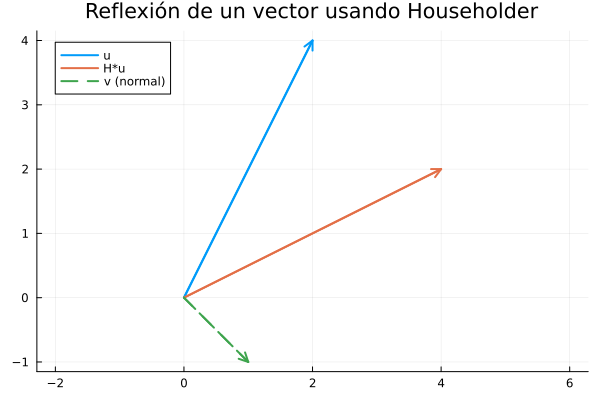

In [ ]:
#Veamos un gráfico
println("Vector original u: ", u)
println("Vector reflejado H*u: ", u_reflejado)

plot([0, u[1]], [0, u[2]], label="u", lw=2, arrow=:arrow, legend=:topleft)
plot!([0, u_reflejado[1]], [0, u_reflejado[2]], label="H*u", lw=2, arrow=:arrow)
plot!([0, v[1]], [0, v[2]], label="v (normal)", lw=2, linestyle=:dash, arrow=:arrow)
plot!(aspect_ratio=:equal, grid=:on, title="Reflexión de un vector usando Householder")



Observar que $H$

---


---

# Vectores y Valores Propios (Strang I.6)

Los vectores propios de una matriz (cuadrada) $A$ son vectores que no cambian de dirección cuando los multiplicamos por $A$. El producto $Ax$ está en la misma línea que $x$:

$$
Ax = \lambda x
$$

Observar que es fundamental que la matriz sea cuadrada, (no tiene sentido hablar de un vector propio en el caso rectangular).

Esto significa que:
- $x$ es *vector propio* de $A$
- $\lambda$ es *valor propio* de $A$

Si multiplicamos de nuevo por $A$, obtenemos:

$$
A^2 x = A(Ax) = A(\lambda x) = \lambda (Ax) = \lambda^2 x
$$

Por tanto:
- $x$ sigue siendo eigenvector de $A^2$
- su eigenvalor se convierte en $\lambda^2$

En general:

$$
A^k x = \lambda^k x \quad \text{para } k = 1, 2, 3, \dots
$$
Si $A$ fuera invertible tendríamos
$$
A^{-1} x = \frac{1}{\lambda} x \quad \text{si } \lambda \ne 0
$$

Supongamos que $A$ tiene $n$ vectores propios independientes $x_1, \dots, x_n$ con valores propios distintos $\lambda_1, \dots, \lambda_n$. Entonces cualquier vector $v$ en $\mathbb{R}^n$ puede escribirse como combinación lineal de los eigenvectores:

$$
v = c_1 x_1 + c_2 x_2 + \dots + c_n x_n
$$

Entonces:

$$
Av = c_1 \lambda_1 x_1 + c_2 \lambda_2 x_2 + \dots + c_n \lambda_n x_n \\
\vdots\\
A^k v = c_1 \lambda_1^k x_1 + c_2 \lambda_2^k x_2 + \dots + c_n \lambda_n^k x_n
$$

Esto significa que si $|\lambda_1| > 1$, esa componente crecerá con $k$.  
Si $|\lambda_2| < 1$, entonces esa componente se atenuará.  
**Por eso es importante estudiar cada eigenvector por separado.**

---

**Observación:**

En el caso anterior tenemos que si  
$$
X=(x_1,\ldots,x_n), \quad D=\textrm{diag}(\lambda_1,\ldots,\lambda_n)
$$
tenemos que
$$AX=XD.$$

O análogamente,
$$
A=XDX^{-1}.
$$
Recordar que cuando $A$ tiene una base de vectores propios, entonces $A$ se dice **diagonalizable**.


### Ejemplo numérico:

Sea
$$
S = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}
$$

Tiene vectores propios:
- $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ con $\lambda = 3$
- $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$ con $\lambda = 1$

Entonces las potencias $S^k$ crecerán como $3^k$.


In [81]:
S=[2 1;1 2]

2×2 Matrix{Int64}:
 2  1
 1  2

In [83]:
S*[1,1]

2-element Vector{Int64}:
 3
 3

In [84]:
S*[1,-1]

2-element Vector{Int64}:
  1
 -1

In [85]:
# En Julia el comando eigen() da los valores y vectores propios
L,V=eigen(S)
println(L)
println(V)

[1.0, 3.0]
[-0.7071067811865475 0.7071067811865475; 0.7071067811865475 0.7071067811865475]


In [100]:
println(rank([[1,1] V[:,2]]),",",rank([[1,-1] V[:,1]])) # veamos que son colineales


1,1


Consideremos un ejemplo más interesante, donde intentaremos ver qué sucede cuando a operamos sobre un vector (o dirección) con potencias de una matriz.

Consideremos una matriz $A$ con valores propios $2$ y $1/2$.

In [134]:
#  Matriz con eigenvalores 2 y 1/2
D = [2.0 0.0; 0.0 0.5]  # diagonal, para asegurar autovalores deseados
# La giramos, y que parezca un accidente
X=randn(2,2)
A=X*D*inv(X) # AX=DX

2×2 Matrix{Float64}:
  1.7405   -0.262033
 -1.22851   0.759499

Veamos que $X$ contiene los vectores propios:

In [135]:
norm(A*X-X*D)

4.518280359883027e-16

In [136]:
# Generamos un vector uniforme en el círculo unitario
θ = 2π * rand()
v0 = [cos(θ), sin(θ)]

println("Vector inicial v₀:")
display(v0)

# Normalizamos
v = v0 / norm(v0)

# Almacenamos trayectorias para graficar
trajectory = [v]


Vector inicial v₀:


2-element Vector{Float64}:
 -0.9298355603961795
  0.36797531251800414

1-element Vector{Vector{Float64}}:
 [-0.9298355603961795, 0.36797531251800414]

Ahora queremos realizar las iteraciones $A^kv$ y observar su asintótica. (Para que no explote la compu, y tengamos que evacuar, vamos normalizando en cada paso).

In [137]:
# Iteraciones del método de la potencia
for _ in 1:20
    v = A * v
    v = v / norm(v)
    push!(trajectory, v)
end

?A qué dirección debería acercarse $A^kv$?

In [138]:
# Vector propio (corresponde a eigenvalor 2)
v_dom = X[:,1]
A*v ==2*v

false

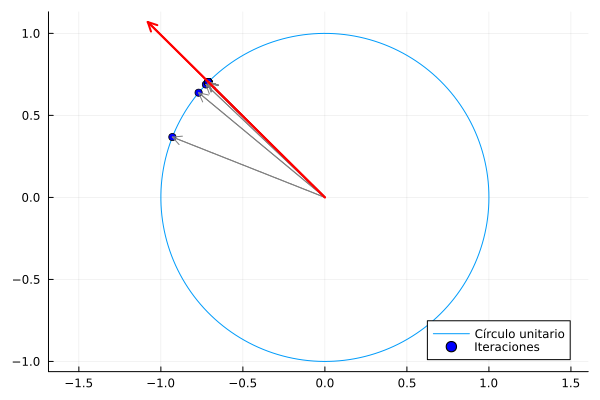

In [139]:
# Graficamos el círculo unitario y las iteraciones
θs = range(0, 2π, length=200)
circle_x = cos.(θs)
circle_y = sin.(θs)

# Separar componentes
x_vals = [v[1] for v in trajectory]
y_vals = [v[2] for v in trajectory]

# Ploteo
plot(circle_x, circle_y, label="Círculo unitario", aspect_ratio=1, legend=:bottomright)
scatter!(x_vals, y_vals, label="Iteraciones", marker=:circle, color=:blue)

# Dibujar flechas desde el origen a cada punto de la trayectoria
for v in trajectory
    quiver!([0.0], [0.0], quiver=([v[1]], [v[2]]), arrow=true, color=:gray, label=false)
end

# Flecha para el eigenvector dominante
quiver!([0.0], [0.0], quiver=([v_dom[1]], [v_dom[2]]), arrow=true, color=:red, lw=2, label="Eigenvector dominante")

Veamos un ejemplo más elaborado en el espacio.

Vector inicial v₀:


3-element Vector{Float64}:
 0.6729339563775302
 0.6699242258162217
 0.3136262457426361

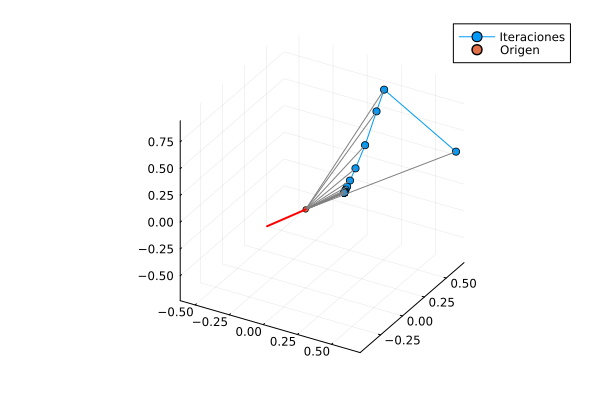

In [140]:
# Matriz diagonal para garantizar autovalores reales y distintos
D = Diagonal([3.0, 1.5, 0.2])
X = randn(3,3)
A = X * D * inv(X)  # A = XDX⁻¹

# Vector aleatorio en la esfera unitaria de R³
v0 = randn(3)
v0 /= norm(v0)

println("Vector inicial v₀:")
display(v0)

# Inicialización
v = v0
trajectory = [v]

# Iteraciones del método de la potencia
for _ in 1:20
    v = A * v
    v = v / norm(v)
    push!(trajectory, v)
end

# Vector propio dominante (asociado al mayor autovalor)
v_dom = X[:,1]  # X[:,1] es el eigenvector correspondiente al mayor valor en D
v_dom /= norm(v_dom)

# Extraer coordenadas para graficar
x_vals = [v[1] for v in trajectory]
y_vals = [v[2] for v in trajectory]
z_vals = [v[3] for v in trajectory]

# Ploteo en 3D
plot3d(x_vals, y_vals, z_vals, label="Iteraciones", marker=:circle, legend=:topright)
scatter3d!([0.0], [0.0], [0.0], markersize=3, label="Origen")

# Flechas desde el origen a cada punto de la trayectoria
for v in trajectory
    quiver!([0.0], [0.0], [0.0], quiver=([v[1]], [v[2]], [v[3]]), arrow=true, color=:gray, label=false)
end

# Flecha para el eigenvector dominante
quiver!([0.0], [0.0], [0.0], quiver=([v_dom[1]], [v_dom[2]], [v_dom[3]]), arrow=true, color=:red, lw=2, label="Eigenvector dominante")


Vector inicial v₀:


3-element Vector{Float64}:
 0.44861868254869935
 0.023763457066962628
 0.8934072843762221

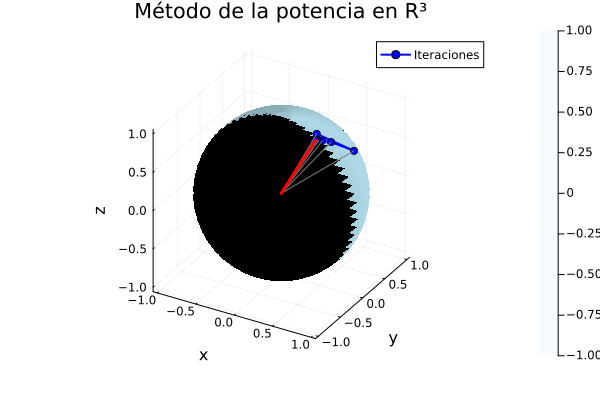

In [141]:
using LinearAlgebra
using Plots

# Matriz con autovalores reales y distintos
D = Diagonal([3.0, 1.5, 0.2])
X = randn(3,3)
A = X * D * inv(X)  # A = X D X⁻¹

# Vector aleatorio en la esfera unitaria de R³
v0 = randn(3)
v0 /= norm(v0)

println("Vector inicial v₀:")
display(v0)

# Método de la potencia
v = v0
trajectory = [v]

for _ in 1:20
    v = A * v
    v = v / norm(v)
    push!(trajectory, v)
end

# Vector propio dominante
v_dom = X[:,1]
v_dom /= norm(v_dom)

# Traer coordenadas
x_vals = [v[1] for v in trajectory]
y_vals = [v[2] for v in trajectory]
z_vals = [v[3] for v in trajectory]

# Crear una malla para graficar la esfera unitaria
φ = range(0, 2π, length=60)
θ = range(0, π, length=30)
sphere_x = [sin(t)*cos(p) for t in θ, p in φ]
sphere_y = [sin(t)*sin(p) for t in θ, p in φ]
sphere_z = [cos(t) for t in θ, _ in φ]

# Graficar esfera
plot3d(sphere_x, sphere_y, sphere_z, st=:surface, alpha=0.1, label="", color=:lightblue)

# Trayectoria del método de la potencia
plot3d!(x_vals, y_vals, z_vals, label="Iteraciones", marker=:circle, color=:blue, lw=2)

# Flechas desde el origen
for v in trajectory
    quiver!([0.0], [0.0], [0.0], quiver=([v[1]], [v[2]], [v[3]]), arrow=true, color=:gray, label=false)
end

# Eigenvector dominante
quiver!([0.0], [0.0], [0.0], quiver=([v_dom[1]], [v_dom[2]], [v_dom[3]]), arrow=true, color=:red, lw=3, label="Eigenvector dominante")

# Estética general
plot!(title="Método de la potencia en R³", legend=:topright, xlabel="x", ylabel="y", zlabel="z")



---

### Propiedades importantes y comentarios sobre el espectro:

Si conocemos el espectro de una matriz, varias caracterísiticas de la matriz son conocidas. Por ejemplo, en nuestro caso:

1. **Traza**: $\lambda_1 + \lambda_2 = \text{tr}(S) = 4$
2. **Determinante**: $\lambda_1 \lambda_2 = \det(S) = 3$
3. **Valores propios reales**: si $S$ es simétrica, todos los $\lambda$ son reales
4. **Vectores propios ortogonales**: si $\lambda_1 \ne \lambda_2$, entonces $x_1 \cdot x_2 = 0$

---

Para matrices ortogonales $Q$, todos los eigenvalores $\lambda$ satisfacen $|\lambda| = 1$,  
así que las potencias $Q^k$ no crecen ni se atenúan: $Q$, $Q^2$, $Q^3$, ... también son ortogonales.